<a href="https://colab.research.google.com/github/sejii93/Probability-Model/blob/main/Exponential_Smoothing_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('/content/drive/MyDrive/probability model/Passenger data_intl_2020.csv',parse_dates=['date'],index_col='date')
                 
df.head(5)

,Intl pax
date,
2020-04-01,37034
2020-05-01,39580
2020-06-01,48599
2020-07-01,52958
2020-08-01,54539


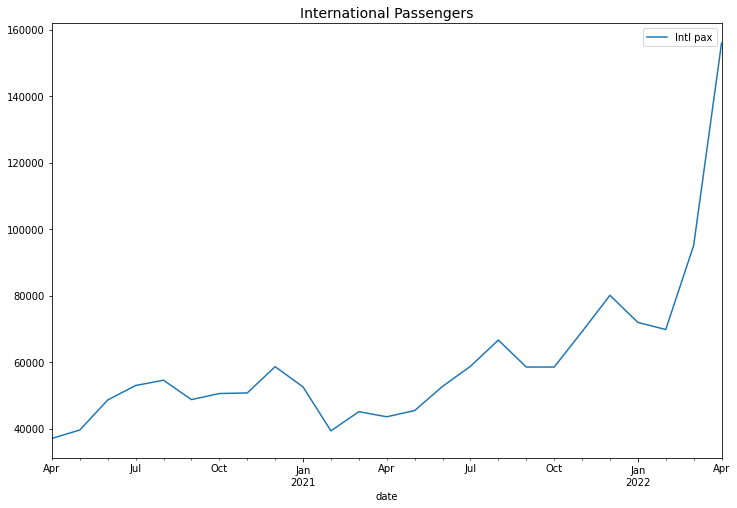

In [31]:
## time series plot
df.plot(figsize=[12,8])
plt.title('International Passengers', fontsize=14)
plt.show()

In [32]:
## split between the training and the test data sets. 
## The last 12 periods form the test data
df_train = df.iloc[:]
#df_test = df.iloc[-12:]

In [33]:
## exponential smoothing in Python
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [34]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(df_train,).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [35]:
# Trend
fit2 = Holt(df_train).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [36]:
# Exponential trend
fit3 = Holt(df_train,exponential=True).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [37]:
## accessing the results of SimpleExpSmoothing Model
print(fit1.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                   25
Model:             SimpleExpSmoothing   SSE                     5325236123.000
Optimized:                       True   AIC                            483.421
Trend:                           None   BIC                            485.859
Seasonal:                        None   AICC                           485.421
Seasonal Periods:                None   Date:                 Tue, 31 May 2022
Box-Cox:                        False   Time:                         09:47:12
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level              37034.000                

In [38]:
## accessing the results of 
print(fit2.summary())

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                   25
Model:                           Holt   SSE                     3808376214.871
Optimized:                       True   AIC                            479.040
Trend:                       Additive   BIC                            483.915
Seasonal:                        None   AICC                           483.706
Seasonal Periods:                None   Date:                 Tue, 31 May 2022
Box-Cox:                        False   Time:                         09:47:15
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_slope            1.0000000                

In [39]:
## accessing the results of 
print(fit3.summary())

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                   25
Model:                           Holt   SSE                     3282601406.531
Optimized:                       True   AIC                            475.326
Trend:                 Multiplicative   BIC                            480.201
Seasonal:                        None   AICC                           479.992
Seasonal Periods:                None   Date:                 Tue, 31 May 2022
Box-Cox:                        False   Time:                         09:47:20
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_slope            1.0000000                

In [40]:
## Holt's Winters's method for time series data with Seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [41]:
# additive model for fixed seasonal variation
fit6 = HWES(df_train, 
             seasonal_periods=12, 
             trend='add', 
             seasonal='add').fit(optimized=True, use_brute=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [42]:
# multiplicative model for increasing seasonal variation
fit7 = HWES(df_train, 
             seasonal_periods=12, 
             trend='add', 
             seasonal='mul').fit(optimized=True, use_brute=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [43]:
## accessing the results of 
print(fit6.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   25
Model:             ExponentialSmoothing   SSE                     2112297622.644
Optimized:                         True   AIC                            488.304
Trend:                         Additive   BIC                            507.806
Seasonal:                      Additive   AICC                           602.304
Seasonal Periods:                    12   Date:                 Tue, 31 May 2022
Box-Cox:                          False   Time:                         09:47:30
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_slope          

In [44]:
## accessing the results of 
print(fit7.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   25
Model:             ExponentialSmoothing   SSE                     1426435873.331
Optimized:                         True   AIC                            478.489
Trend:                         Additive   BIC                            497.991
Seasonal:                Multiplicative   AICC                           592.489
Seasonal Periods:                    12   Date:                 Tue, 31 May 2022
Box-Cox:                          False   Time:                         09:47:33
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8421053                alpha                 True
smoothing_slope          

In [52]:
## forecasting for 12 months
forecast_1 = fit1.forecast(24)
forecast_2 = fit2.forecast(24)
forecast_3 = fit3.forecast(24)
forecast_6 = fit6.forecast(24)
forecast_7 = fit7.forecast(24)

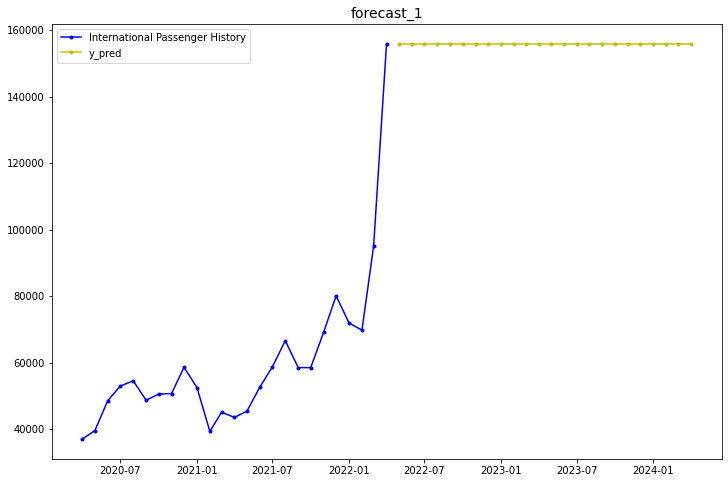

In [53]:
# forecast_1
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='International Passenger History')
pred, = plt.plot(forecast_1.index, forecast_1, 'y.-', label='y_pred')
plt.title('forecast_1', fontsize=14)
plt.legend(handles=[past,pred])
plt.show()

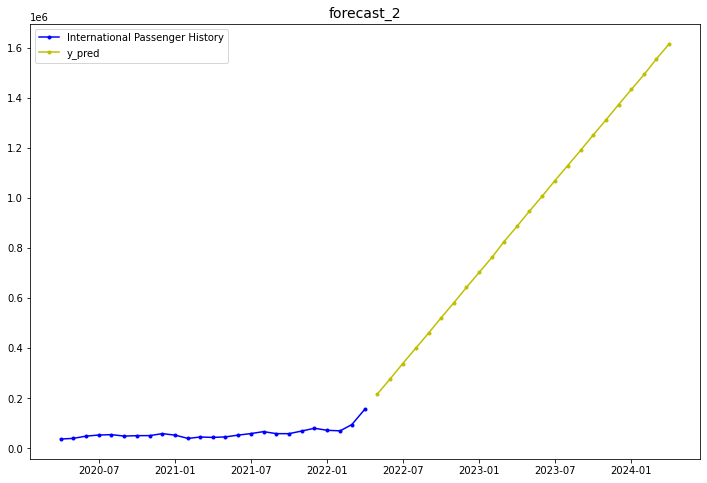

In [54]:
# forecast_2
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='International Passenger History')
pred, = plt.plot(forecast_2.index, forecast_2, 'y.-', label='y_pred')
plt.title('forecast_2', fontsize=14)
plt.legend(handles=[past,pred])
plt.show()

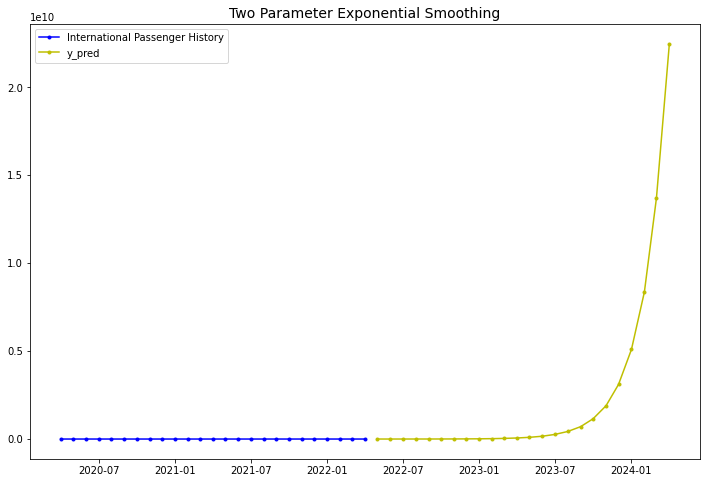

In [55]:
# 1차 선형 추세는 있고 계절성은 없는 이중 지수 평활법
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='International Passenger History')
pred, = plt.plot(forecast_3.index, forecast_3, 'y.-', label='y_pred')
plt.title('Two Parameter Exponential Smoothing', fontsize=14)
plt.legend(handles=[past,pred])
plt.show()

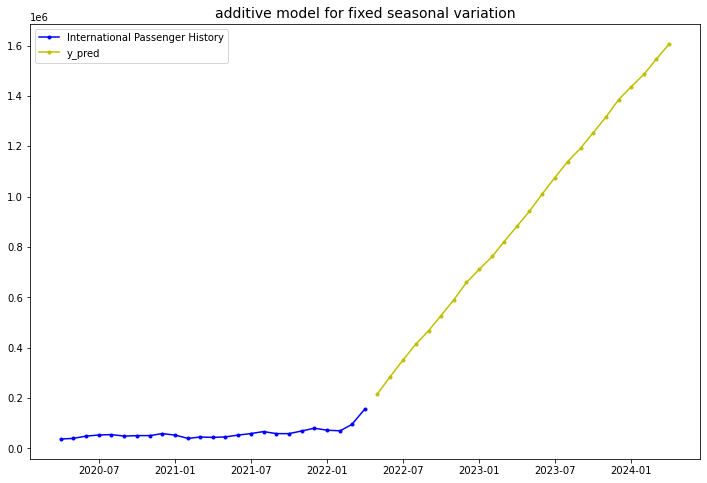

In [56]:
# forecast_6
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='International Passenger History')
#test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(forecast_6.index, forecast_6, 'y.-', label='y_pred')
plt.title('additive model for fixed seasonal variation', fontsize=14)
plt.legend(handles=[past, pred])
plt.show()

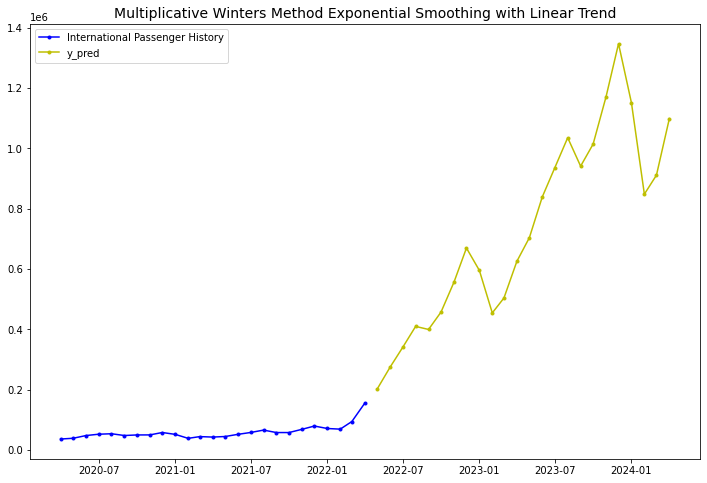

In [57]:
# 1차 선형 추세와 확산계절변동이 있는 승법 윈터스 지수평활법
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='International Passenger History')
#test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(forecast_7.index, forecast_7, 'y.-', label='y_pred')
plt.title('Multiplicative Winters Method Exponential Smoothing with Linear Trend', fontsize=14)
plt.legend(handles=[past, pred])
plt.show()